In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Week 1

In [4]:
observers = [0.2, 0.5, 0.8]

## Equal variance

In [5]:
responses = np.empty((3, 2, 100, 50))

stimulus_repr = np.random.normal(loc=1, size=(100, 50))
no_stimulus_repr = np.random.normal(loc=0, size=(100, 50))

for i, c in enumerate(observers):
  responses[i,1,:,:] = stimulus_repr > c
  responses[i,0,:,:] = no_stimulus_repr > c

false_positives = responses[:,0,:,:].sum(axis=2)
true_positives = responses[:,1,:,:].sum(axis=2)

perceptual_sensitivity = norm.ppf(true_positives / 50) - norm.ppf(false_positives / 50)

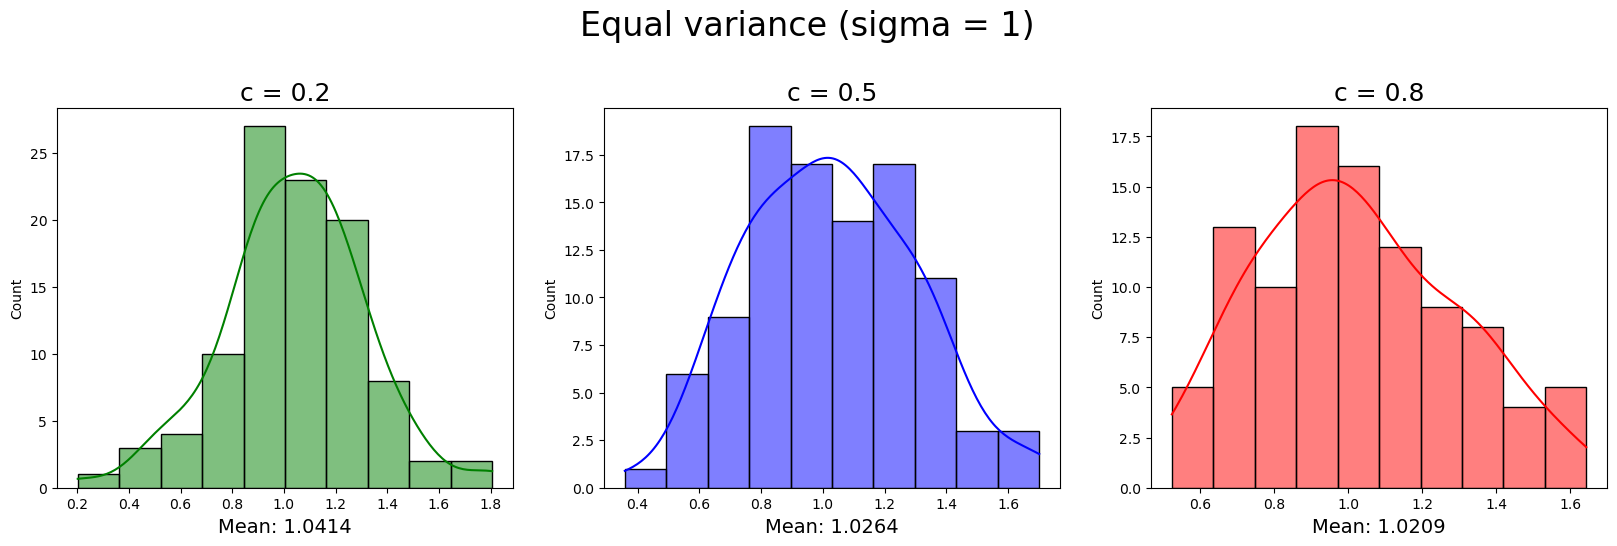

In [6]:
fig, ax = plt.subplots(1,3, figsize=(20,5.5))
fig.suptitle("Equal variance (sigma = 1)", size=24)
col = ["g", "b", "r"]
for i, a in enumerate(ax):
  sns.histplot(data=perceptual_sensitivity[i], color=col[i], kde=True, ax=a, bins=10)
  a.set_title(f"c = {observers[i]}", size=18)
  a.set_xlabel(f"Mean: {np.round(perceptual_sensitivity[i].mean(), 4)}", size=14)

plt.subplots_adjust(top=0.8) 
plt.show()

## Equal variance ($\sigma = 0.8$)

In [7]:
responses = np.empty((3, 2, 100, 50))

stimulus_repr = np.random.normal(loc=1, scale=0.8, size=(100, 50))
no_stimulus_repr = np.random.normal(loc=0, scale=1, size=(100, 50))

for i, c in enumerate(observers):
  responses[i,1,:,:] = stimulus_repr > c
  responses[i,0,:,:] = no_stimulus_repr > c

false_positives = responses[:,0,:,:].sum(axis=2)
true_positives = responses[:,1,:,:].sum(axis=2)

perceptual_sensitivity = norm.ppf(true_positives / 50) - norm.ppf(false_positives / 50)

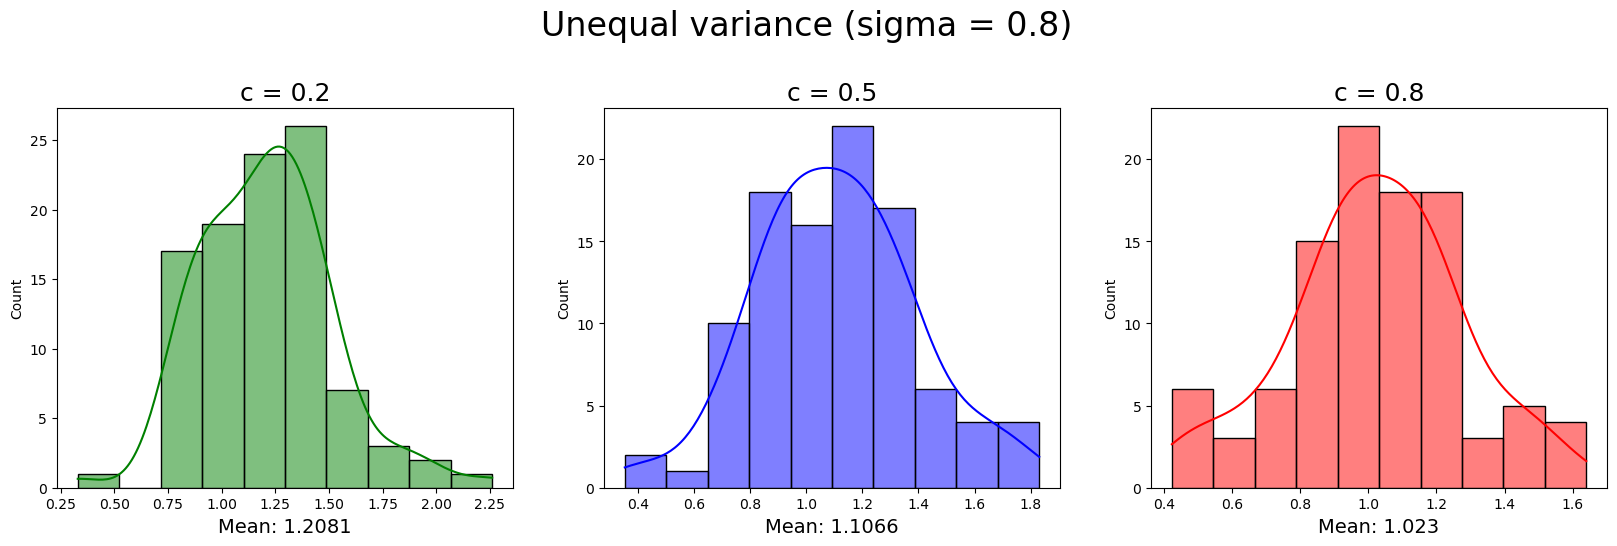

In [8]:
fig, ax = plt.subplots(1,3, figsize=(20,5.5))
fig.suptitle("Unequal variance (sigma = 0.8)", size=24)
col = ["g", "b", "r"]
for i, a in enumerate(ax):
  sns.histplot(data=perceptual_sensitivity[i], color=col[i], kde=True, ax=a, bins=10)
  a.set_title(f"c = {observers[i]}", size=18)
  a.set_xlabel(f"Mean: {np.round(perceptual_sensitivity[i].mean(), 4)}", size=14)
plt.subplots_adjust(top=0.8) 
plt.show()

# Week 2

## Unequal variance model

In [9]:
criteria = [0.2, 0.5, 0.8]

In [10]:
responses = np.empty((3, 2, 100, 50))

stimulus_repr = np.random.normal(loc=1, scale=0.8, size=(100, 50))
no_stimulus_repr = np.random.normal(loc=0, scale=1, size=(100, 50))

for i, c in enumerate(criteria):
  responses[i,1,:,:] = stimulus_repr > c
  responses[i,0,:,:] = no_stimulus_repr > c

false_positives = responses[:,0,:,:].sum(axis=2)
true_positives = responses[:,1,:,:].sum(axis=2)


y = norm.ppf(true_positives / 50)
x = norm.ppf(false_positives / 50)

slope = np.empty(100)
intercept = np.empty(100)

for i in range(100):
  model = LinearRegression()
  model.fit(x[:,i].reshape(-1,1),y[:,i])
  slope[i] = model.coef_
  intercept[i] = model.intercept_

In [11]:
sigma_est = 1/slope
perceptual_sensitivity = intercept*sigma_est

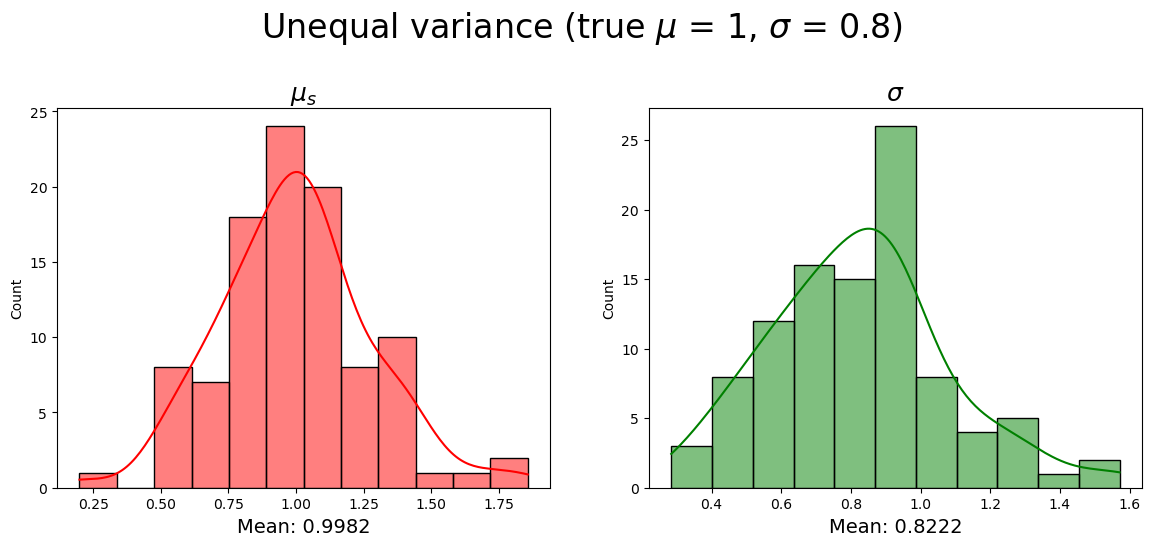

In [12]:
fig, ax = plt.subplots(1,2, figsize=(14,5.5))
fig.suptitle(r"Unequal variance (true $\mu$ = 1, $\sigma$ = 0.8)", size=24)

sns.histplot(data=perceptual_sensitivity, color='r', kde=True, ax = ax[0])
ax[0].set_title(r"$\mu_s$", size=18)
ax[0].set_xlabel(f"Mean: {np.round(perceptual_sensitivity.mean(), 4)}", size=14)

sns.histplot(data=sigma_est, color='g', kde=True, ax = ax[1])
ax[1].set_title(r"$\sigma$", size=18)
ax[1].set_xlabel(f"Mean: {np.round(sigma_est.mean(), 4)}", size=14)
plt.subplots_adjust(top=0.8) 
plt.show()

## Psychometric functions

In [13]:
from scipy.optimize import minimize

In [14]:
dB = np.array([5, 10, 15, 20, 25, 30])
correct = np.array([12, 11, 19, 27, 30, 30])

### psychometric function 1

In [15]:
def loss_1(x):
  c = x[0]
  sigma = x[1]
  l = 0
  for i in range(6):
    P = norm.cdf((dB[i] - c) / sigma)
    P_correct = P + (1-P)*(1/3)
    const = np.log(np.arange(1,31)).sum() - np.log(np.arange(1,correct[i]+1)).sum() - np.log(np.arange(1,31 - correct[i])).sum()
    log_l = const + correct[i] * np.log(P_correct) + (30 - correct[i]) * np.log(1 - P_correct)
    l -= log_l
  return l

In [16]:
x_0 = np.array([10, 15])
psy_func_1 = minimize(loss_1, x_0)
psy_func_1

C:\Users\zande\AppData\Local\Temp\ipykernel_7124\1892539988.py:9: RuntimeWarning: divide by zero encountered in log
  log_l = const + correct[i] * np.log(P_correct) + (30 - correct[i]) * np.log(1 - P_correct)
c:\Users\zande\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 7.637350852186368
 hess_inv: array([[ 1.04141739, -0.4709657 ],
       [-0.4709657 ,  1.00732717]])
      jac: array([5.96046448e-08, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 10
     njev: 21
   status: 0
  success: True
        x: array([15.69202753,  3.77808483])

### psychometric function 2

In [17]:
def loss_2(x):
  c = x[0]
  sigma = x[1]
  l = 0
  for i in range(6):
    P = norm.cdf((dB[i] - c) / sigma)
    const = np.log(np.arange(1,31)).sum() - np.log(np.arange(1,correct[i]+1)).sum() - np.log(np.arange(1,31 - correct[i])).sum()
    log_l = const + correct[i] * np.log(P) + (30 - correct[i]) * np.log(1 - P)
    l -= log_l
  return l

In [18]:
x_0 = np.array([10, 15])
psy_func_2 = minimize(loss_2, x_0)
psy_func_2

      fun: 11.315347372640163
 hess_inv: array([[ 1.1248663 , -0.50668993],
       [-0.50668993,  1.48918118]])
      jac: array([1.07288361e-06, 2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([10.1318477 ,  8.19083044])

### Plots

In [19]:
x_space = np.linspace(0, 30, num=31)

In [20]:
psi_1 = (norm.cdf((x_space - psy_func_1['x'][0]) / psy_func_1['x'][1]))
psi_1 = psi_1 + (1-psi_1)*(1/3)
psi_2 = norm.cdf((x_space - psy_func_2['x'][0]) / psy_func_2['x'][1]) 

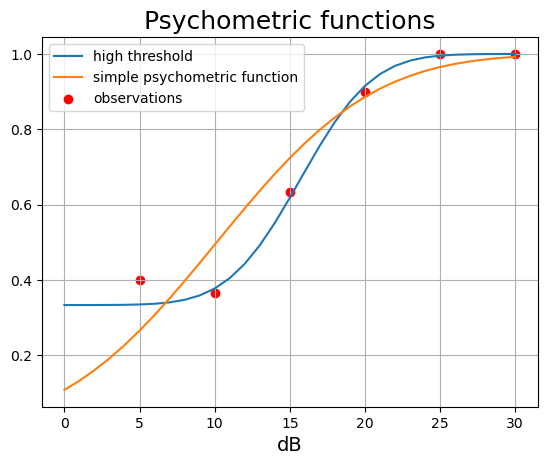

In [21]:
fig = plt.figure()
plt.plot(x_space, psi_1, label="high threshold")
plt.plot(x_space, psi_2, label="simple psychometric function")
plt.scatter(dB, correct/30, color='r', label="observations")
plt.legend()
plt.xlabel("dB", size=14)
plt.grid()
plt.title("Psychometric functions", size=18)
plt.show()

### Negative log-likelihood

In [22]:
print(f"Negative log-likelihood for adjusted model: {loss_1(psy_func_1['x'])}")
print(f"Negative log-likelihood for non-adjusted model: {loss_2(psy_func_2['x'])}")

Negative log-likelihood for adjusted model: 7.637350852186368
Negative log-likelihood for non-adjusted model: 11.315347372640163


### Parameters

In [23]:
print(f"Adjusted model c: {psy_func_1['x'][0]}")
print(f"Adjusted model sigma: {psy_func_1['x'][1]}")
print(f"Non-adjusted model c: {psy_func_2['x'][0]}")
print(f"Non-adjusted model sigma: {psy_func_2['x'][1]}")

Adjusted model c: 15.692027526108054
Adjusted model sigma: 3.7780848292807496
Non-adjusted model c: 10.131847700466846
Non-adjusted model sigma: 8.190830435687978


## Week 3

### Brightness

In [24]:
a1 = 0.33
I_s1 = np.arange(1, 11) 
k_s1 = 10
I_p1 = k_s1*I_s1**a1

In [25]:
model1 = LinearRegression()
model1.fit(np.log(I_s1).reshape(-1,1) , I_p1)
slope1 = model1.coef_
intercept1 = model1.intercept_
k_w1 = 1/slope1
I_01 = np.exp(- intercept1 * k_w1)

In [26]:
print(k_w1)
print(I_01)

[0.19980888]
[0.15559519]


In [27]:
I_pf1 = 1/k_w1 * np.log(I_s1/I_01)

### Electric shock

In [28]:
a2 = 3.3
I_s2 = np.arange(1, 11) 
k_s2 = 10
I_p2 = k_s2*I_s2**a2

In [29]:
model2 = LinearRegression()
model2.fit(np.log(I_s2).reshape(-1,1) , I_p2)
slope2 = model2.coef_
intercept2 = model2.intercept_
k_w2 = 1/slope2
I_02 = np.exp(- intercept2 * k_w2)

In [30]:
print(k_w2)
print(I_02)

[0.0001403]
[2.03758546]


In [31]:
I_pf2 = 1/k_w2 * np.log(I_s2/I_02)

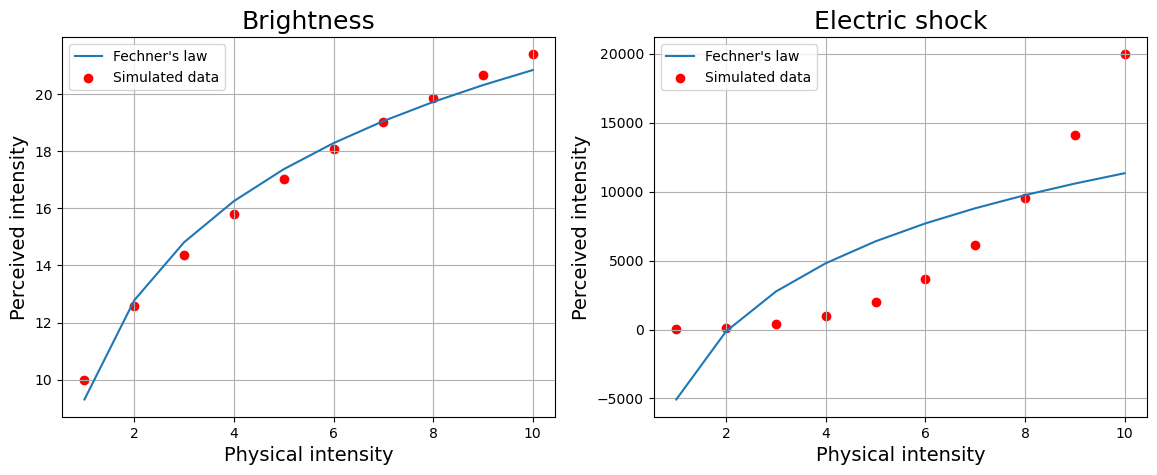

In [32]:
fig, ax = plt.subplots(1,2, figsize=(14,5.5))
#fig.suptitle(r"Unequal variance (true $\mu$ = 1, $\sigma$ = 0.8)", size=24)

ax[0].plot(I_s1, I_pf1, label = "Fechner's law")
ax[0].scatter(I_s1, I_p1, label = "Simulated data", color='r')
ax[0].set_xlabel("Physical intensity", size = 14)
ax[0].set_ylabel("Perceived intensity", size = 14)
ax[0].legend()
ax[0].grid()
ax[0].set_title("Brightness", size=18)

ax[1].plot(I_s2, I_pf2, label = "Fechner's law")
ax[1].scatter(I_s2, I_p2, label = "Simulated data", color='r')
ax[1].set_xlabel("Physical intensity", size = 14 )
ax[1].set_ylabel("Perceived intensity", size = 14)
ax[1].legend()
ax[1].grid()
ax[1].set_title("Electric shock", size=18)

plt.subplots_adjust(top=0.8) 
plt.show()